In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

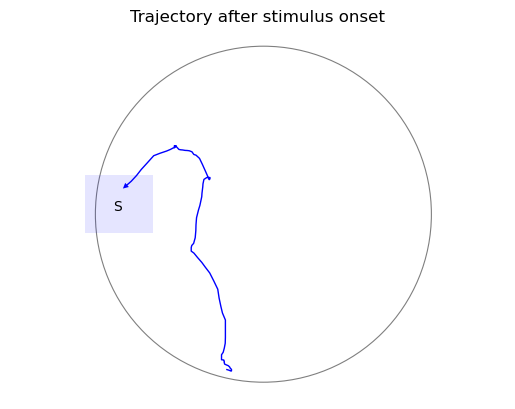

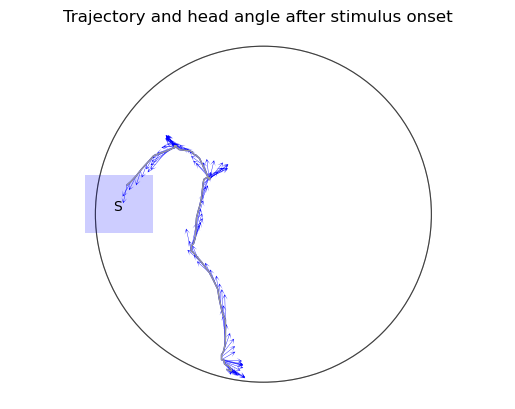

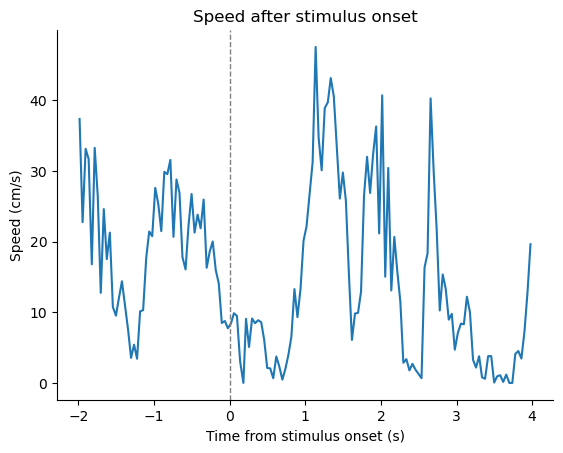

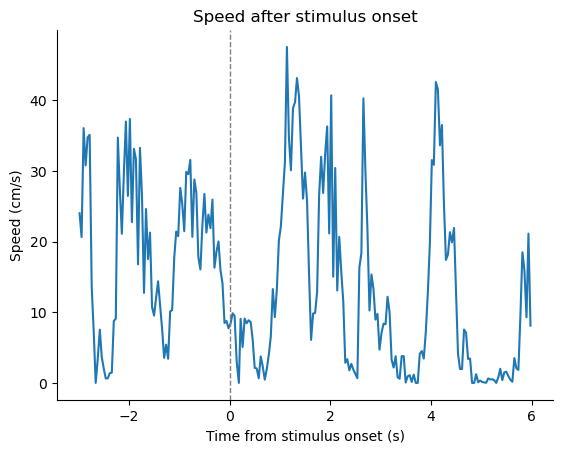

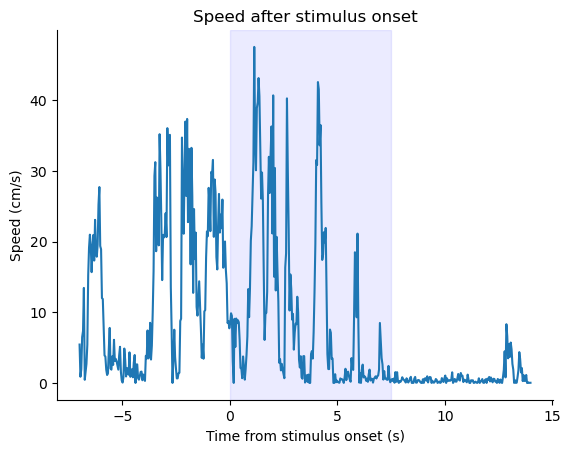

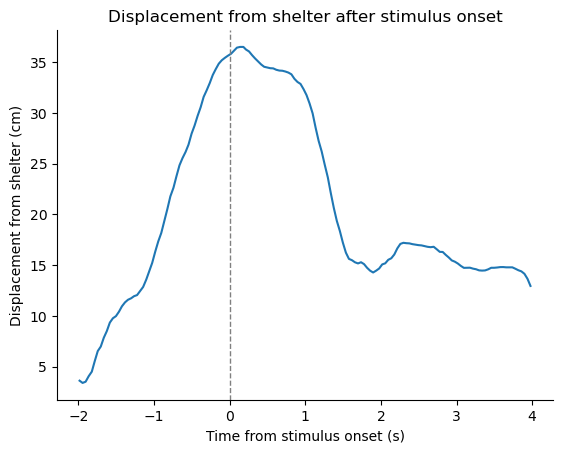

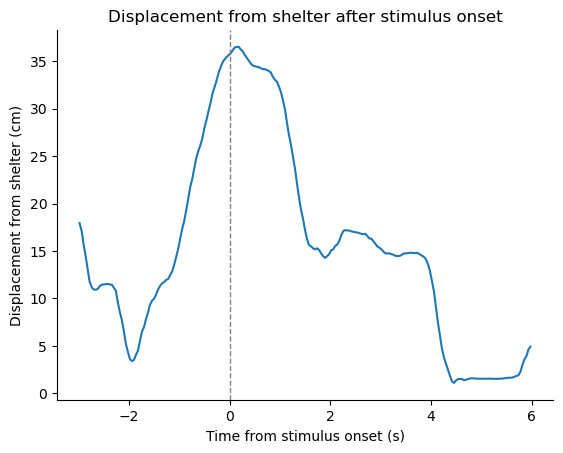

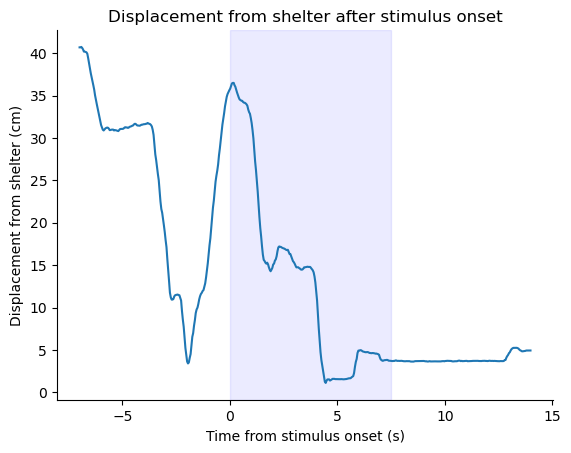

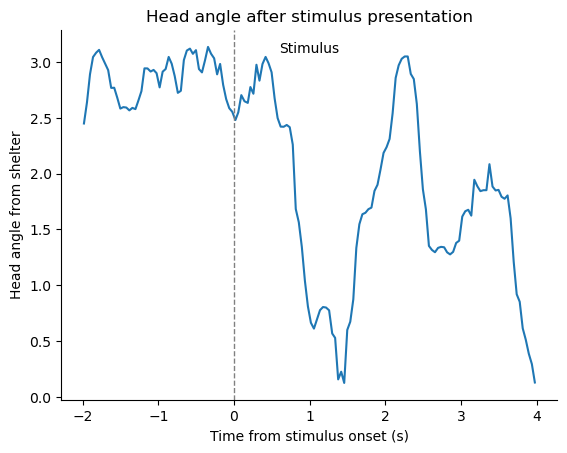

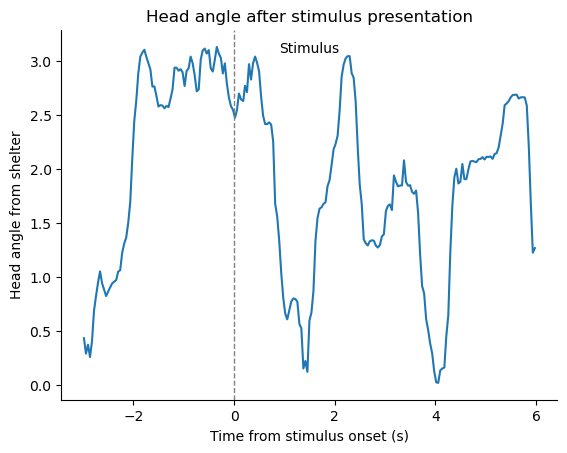

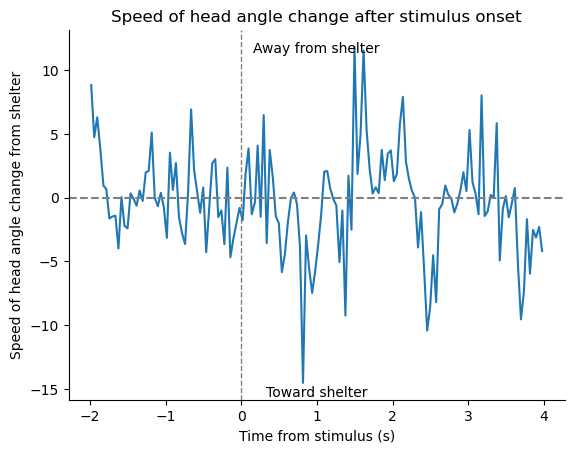

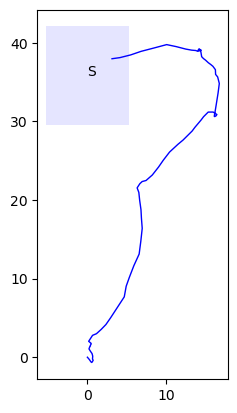

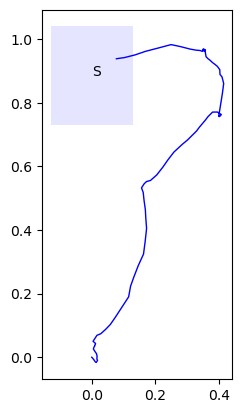

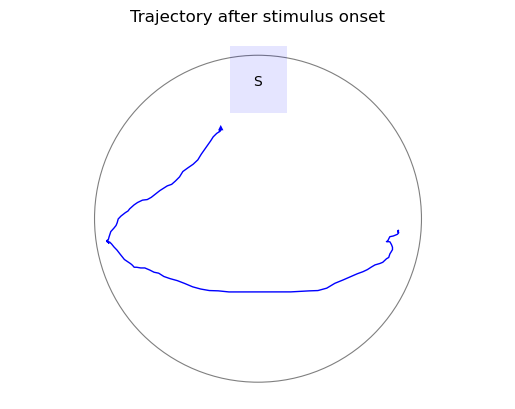

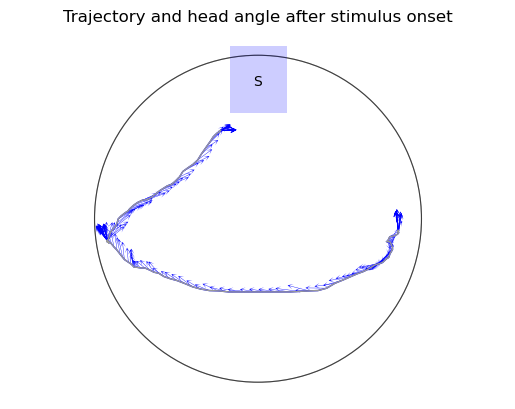

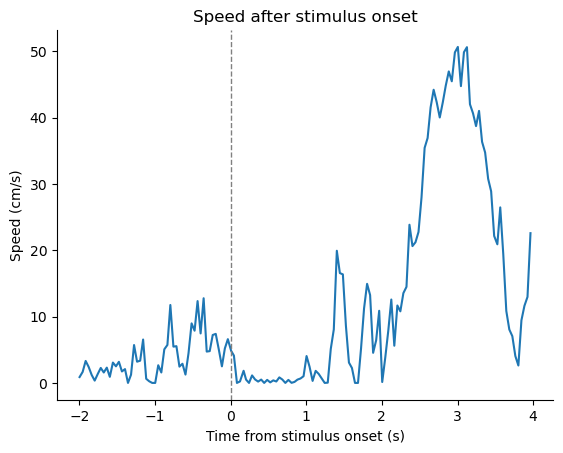

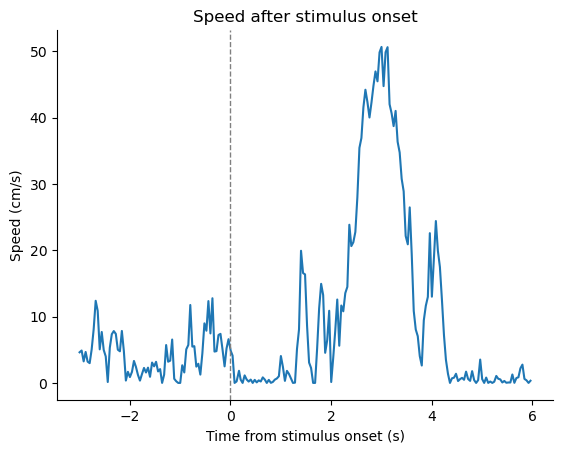

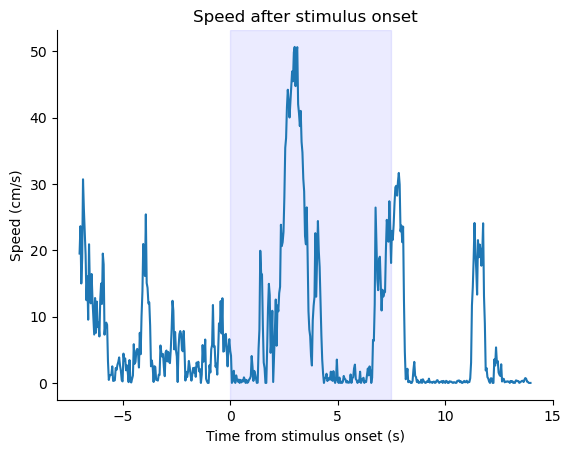

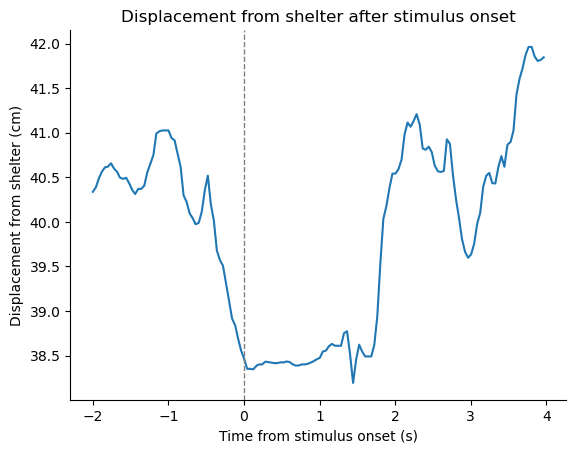

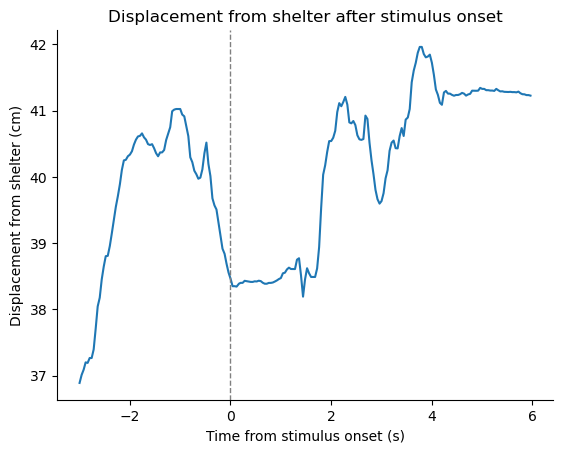

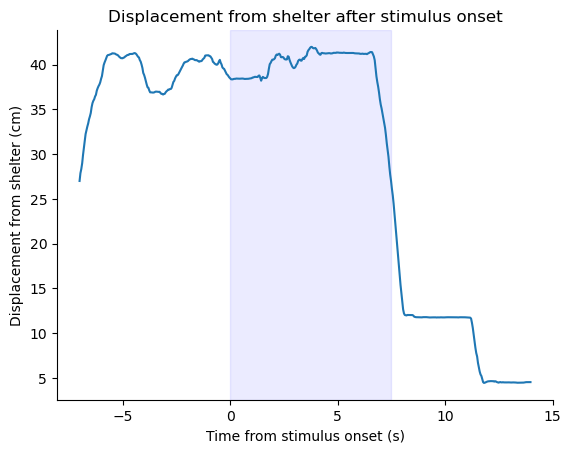

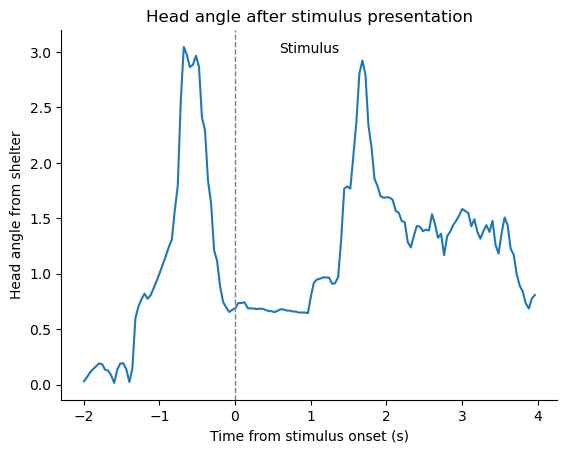

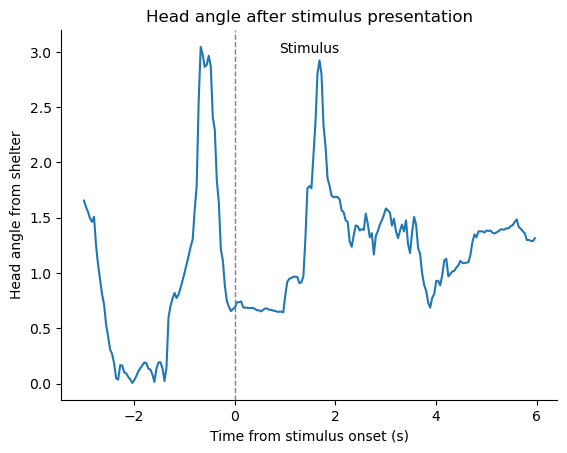

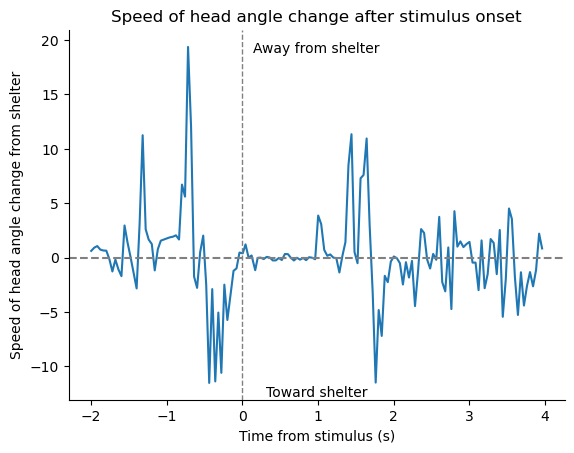

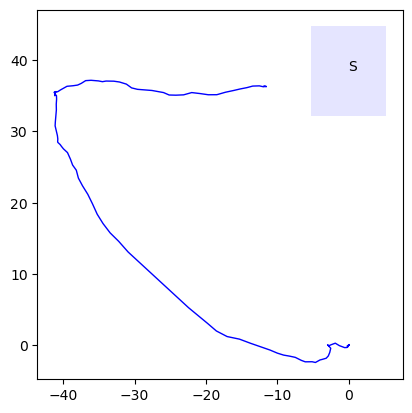

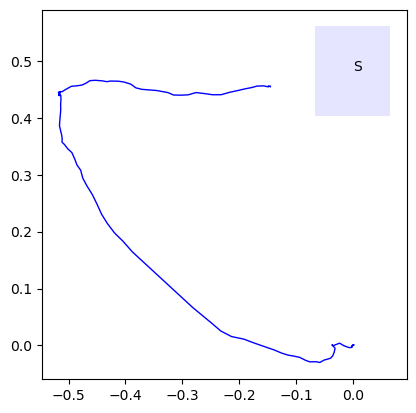

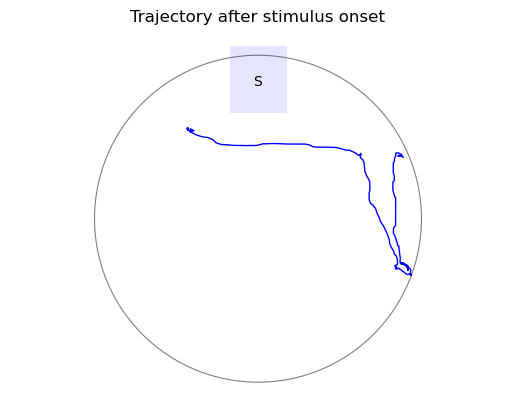

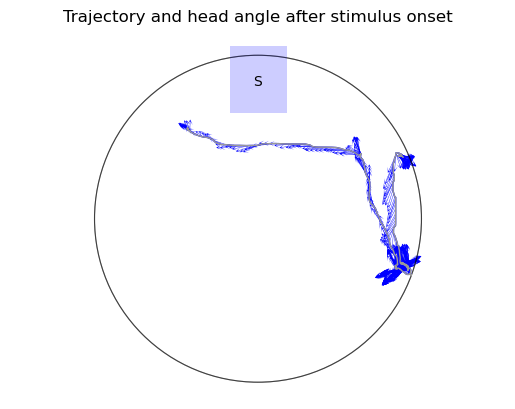

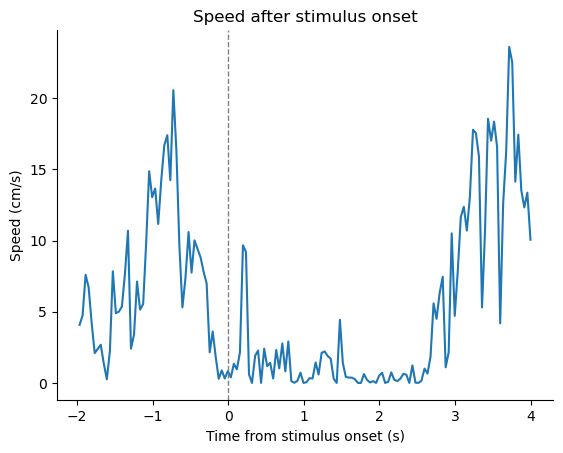

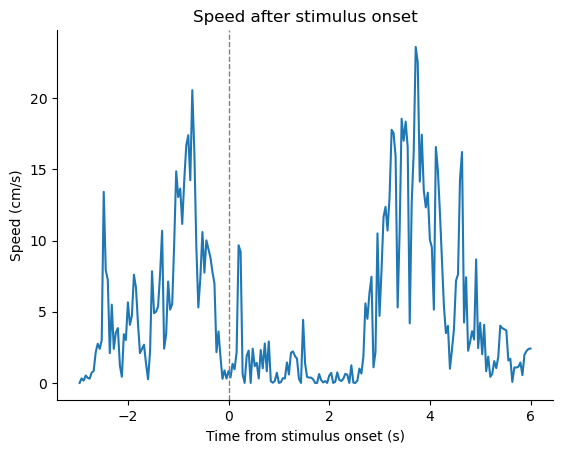

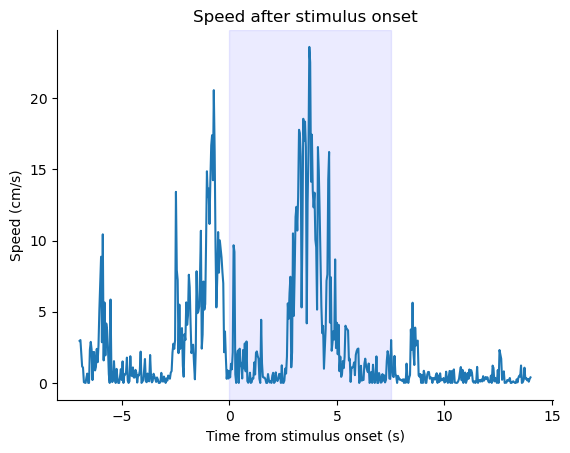

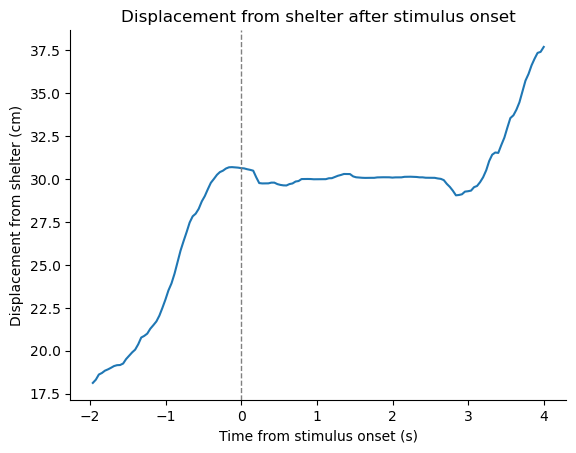

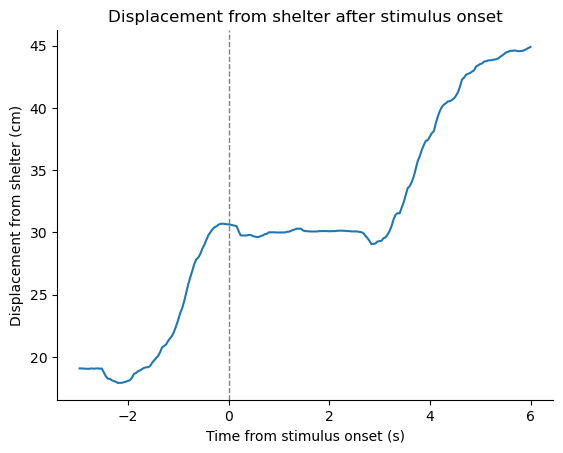

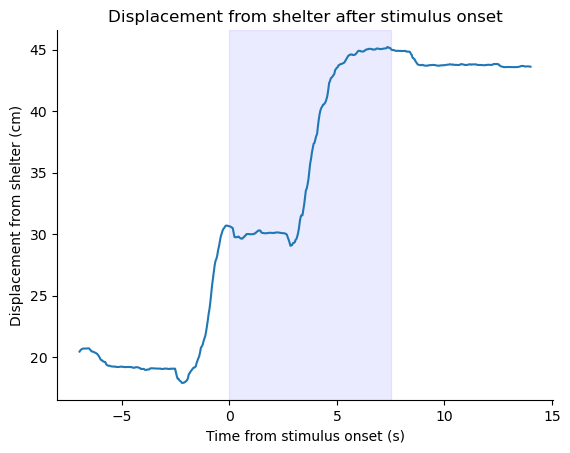

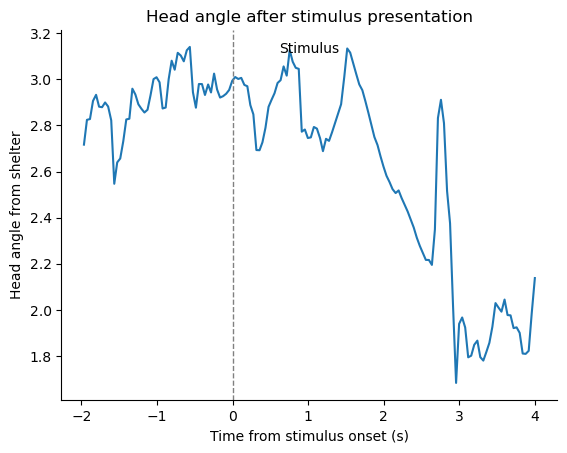

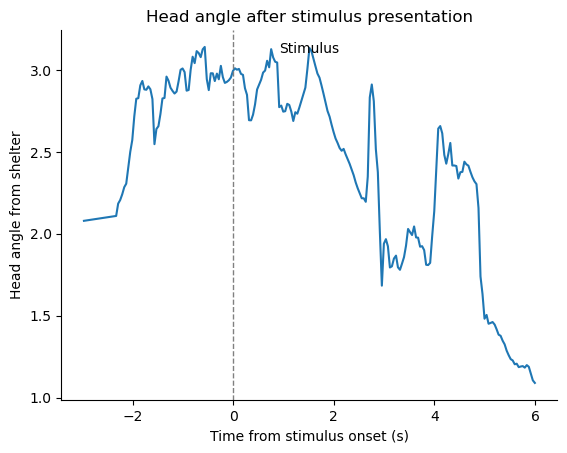

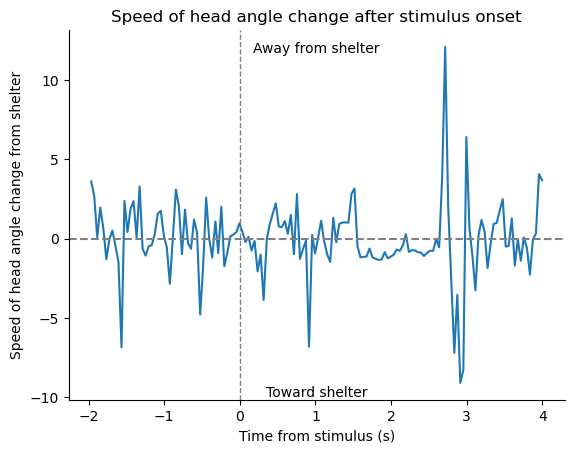

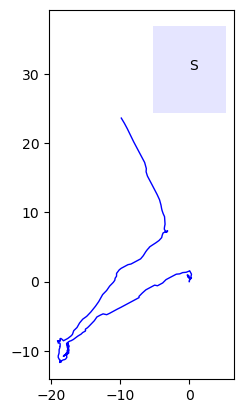

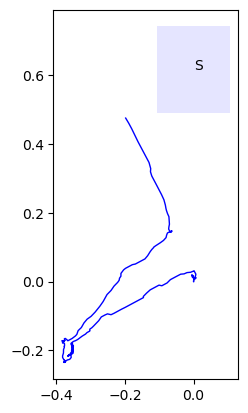

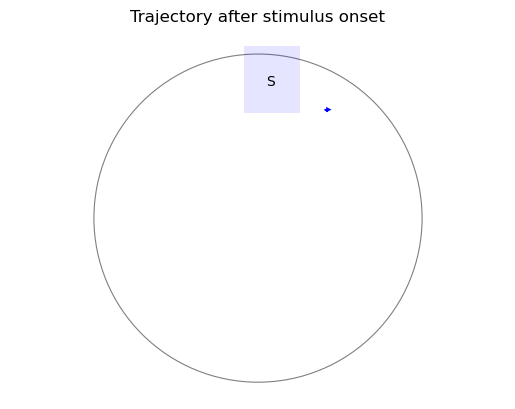

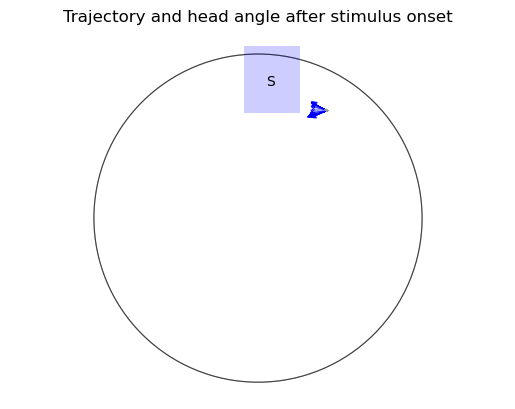

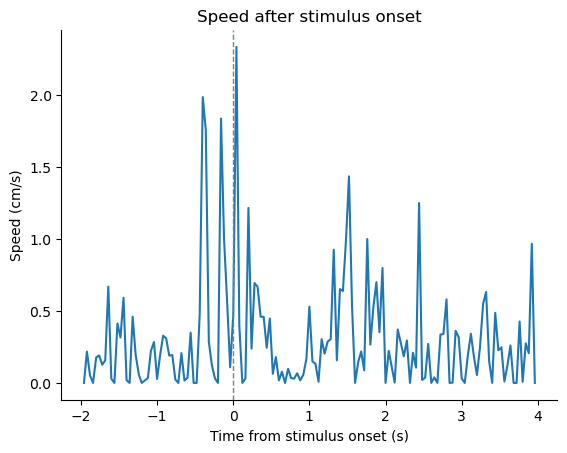

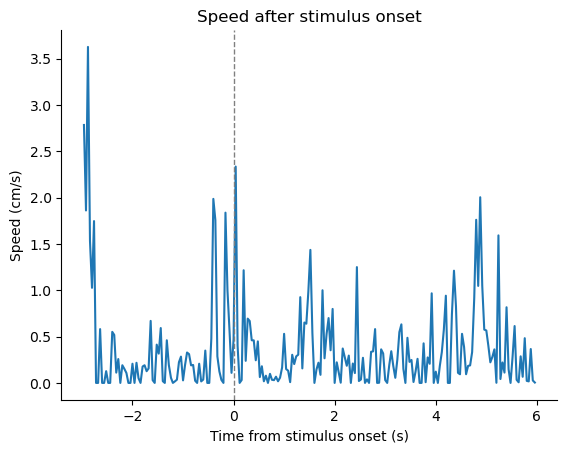

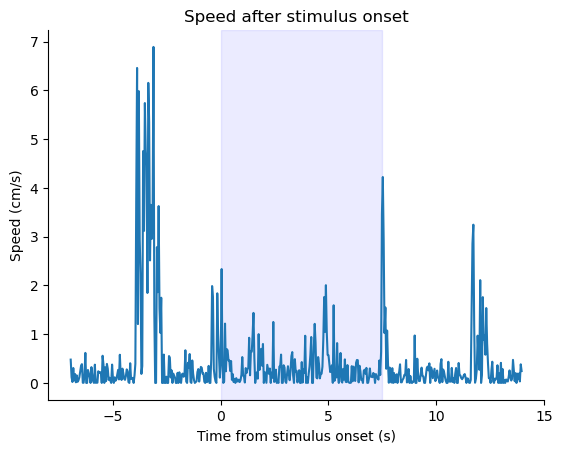

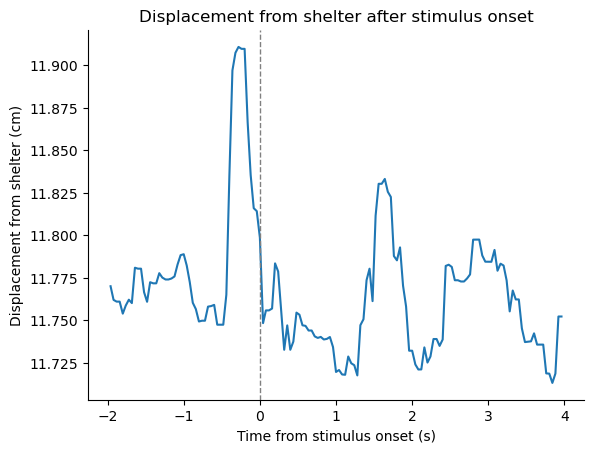

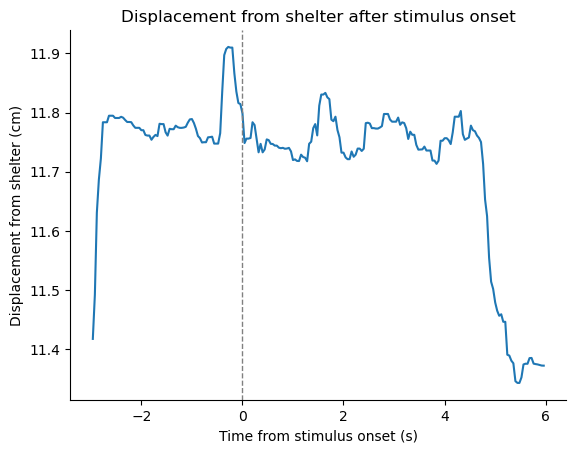

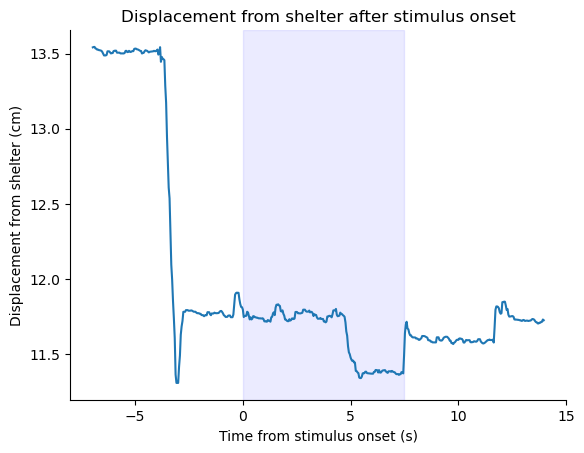

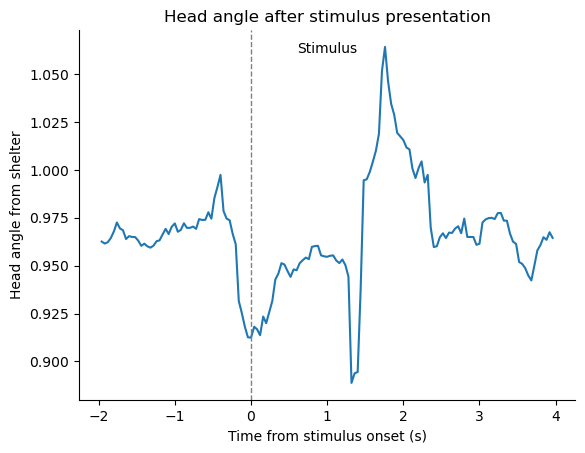

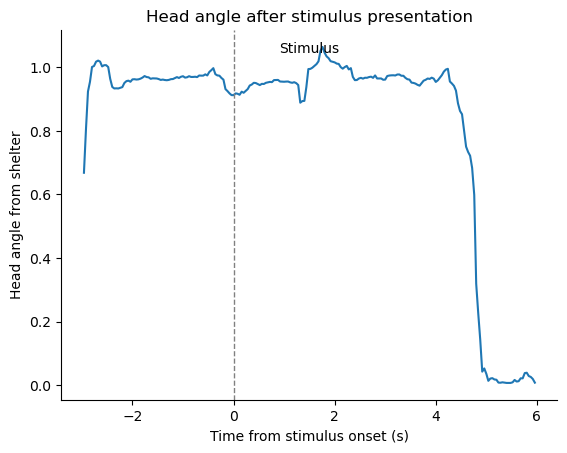

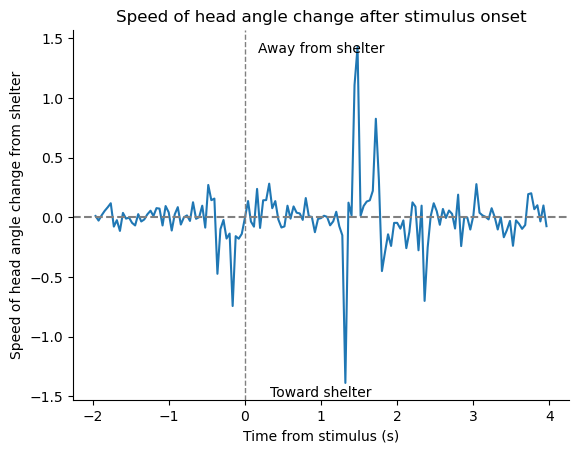

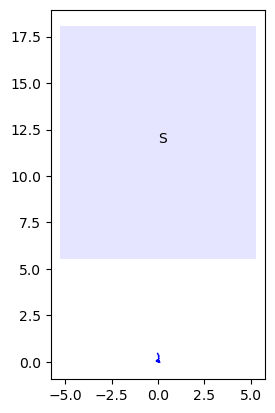

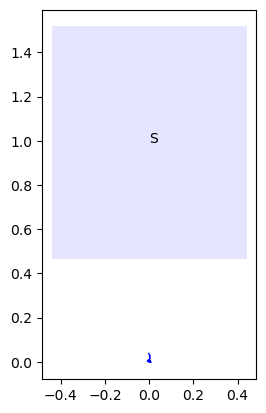

In [2]:
%run compiled_functions_recent.ipynb

%run compiled_trajectory.ipynb

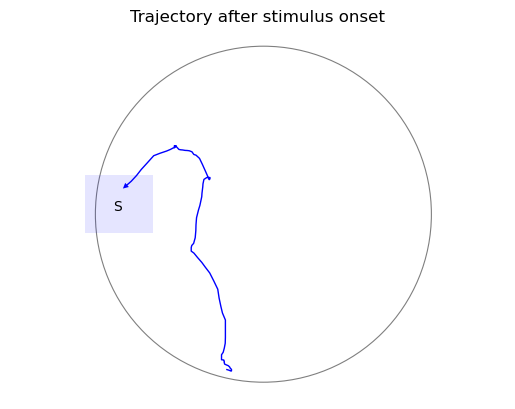

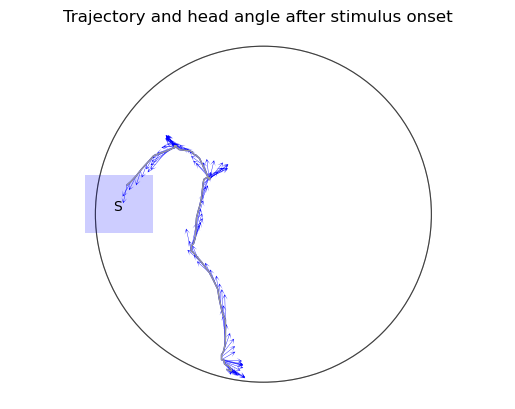

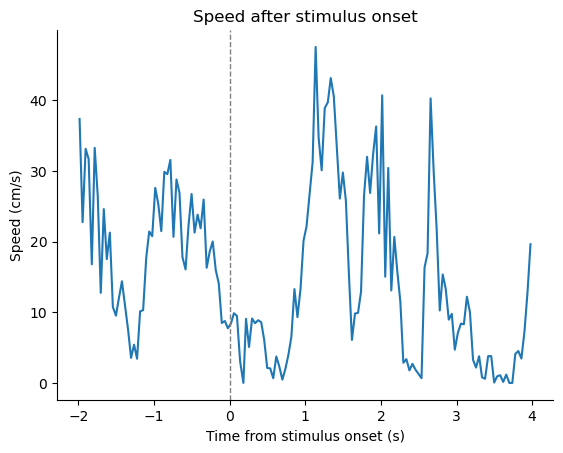

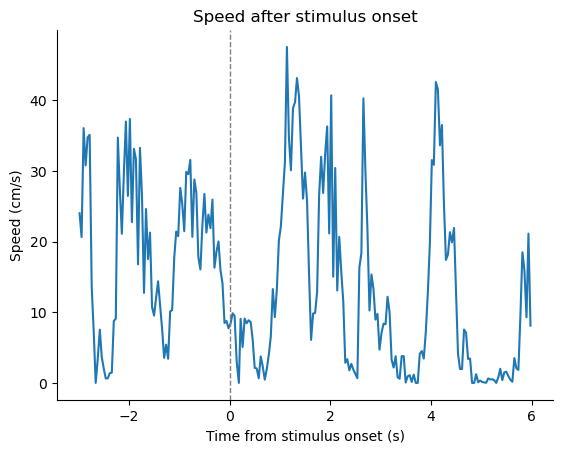

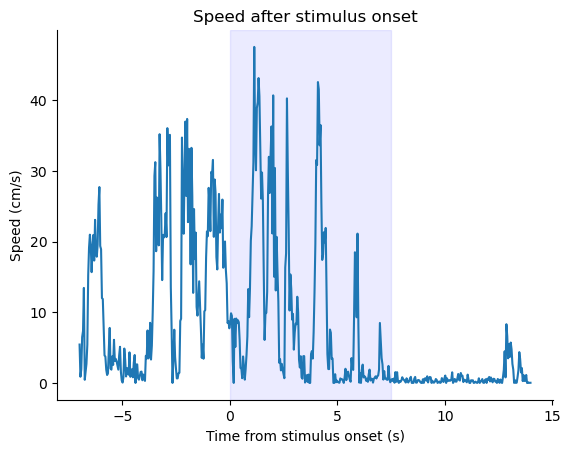

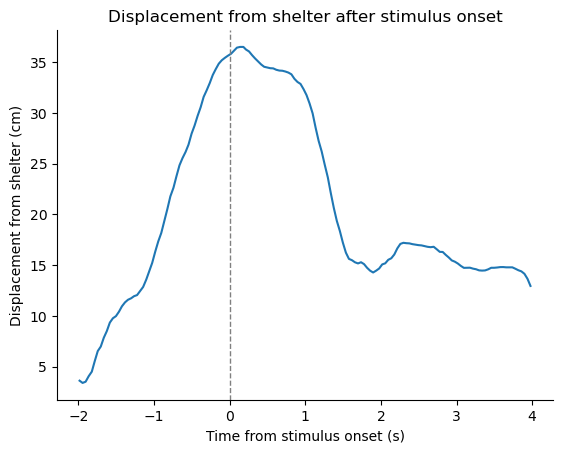

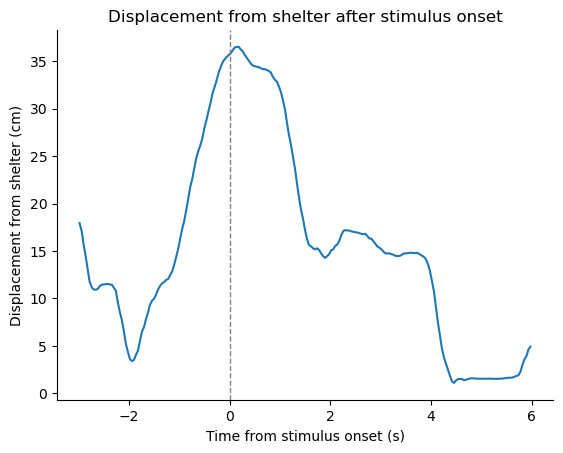

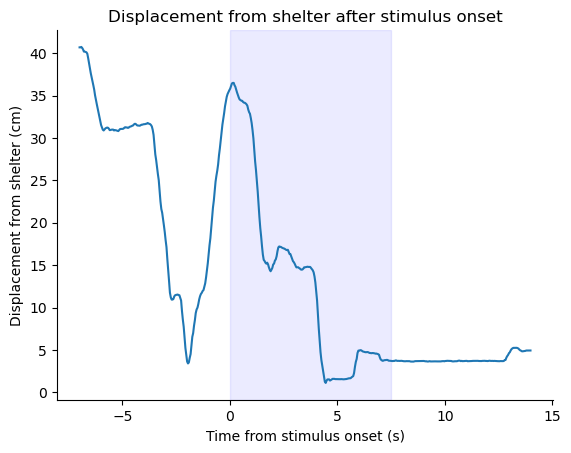

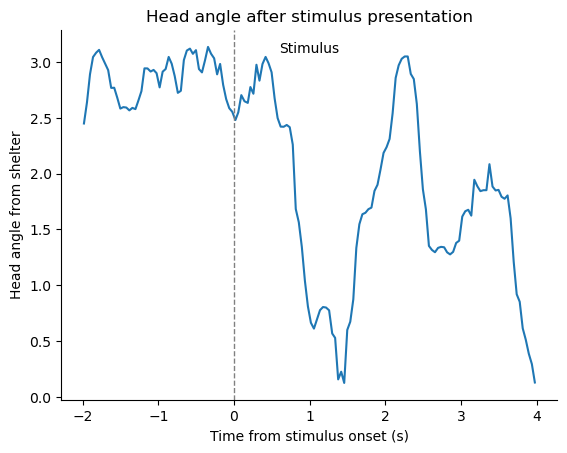

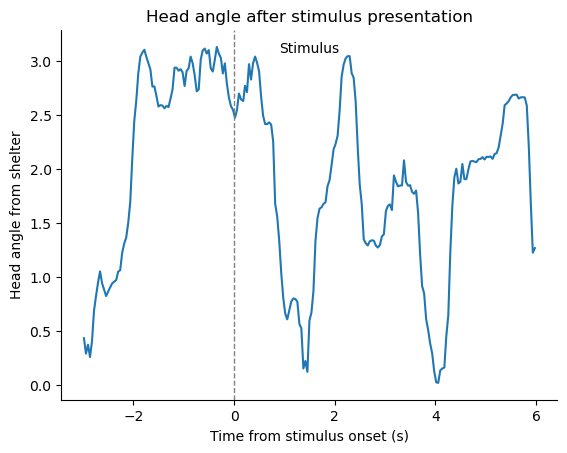

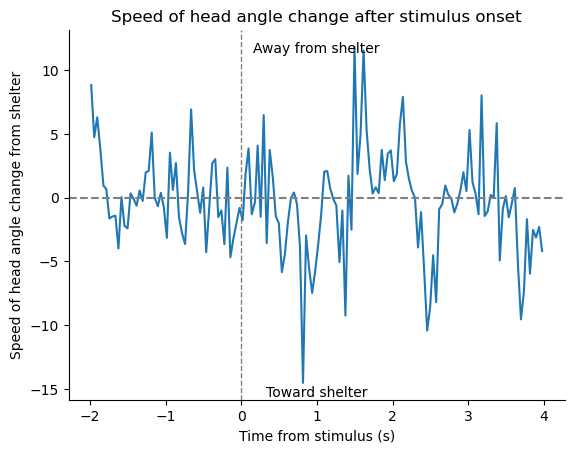

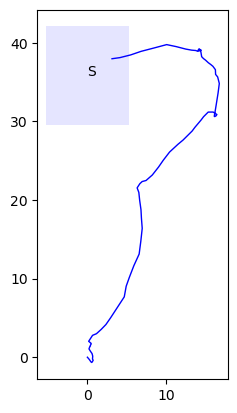

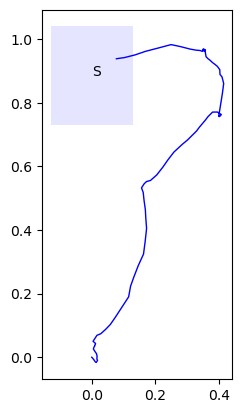

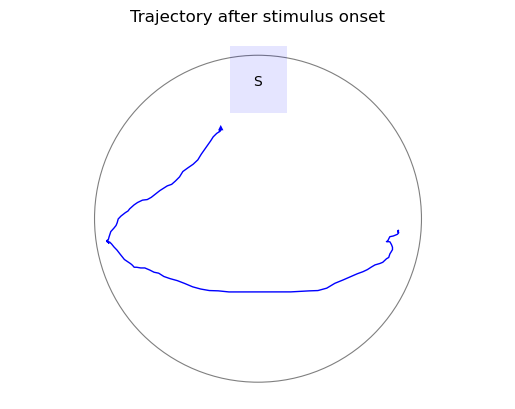

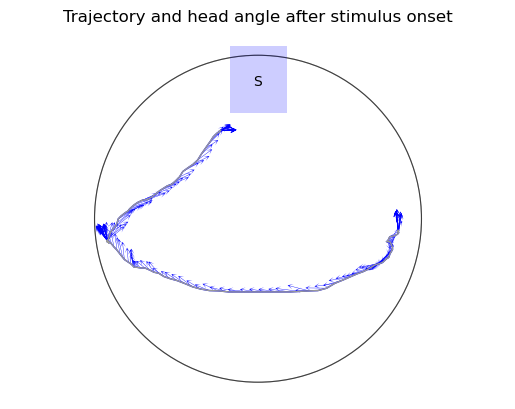

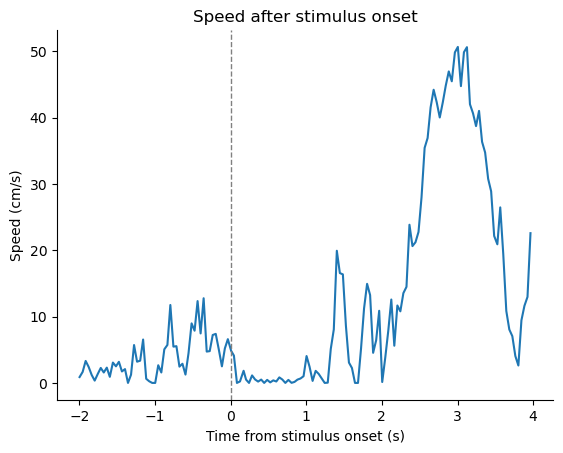

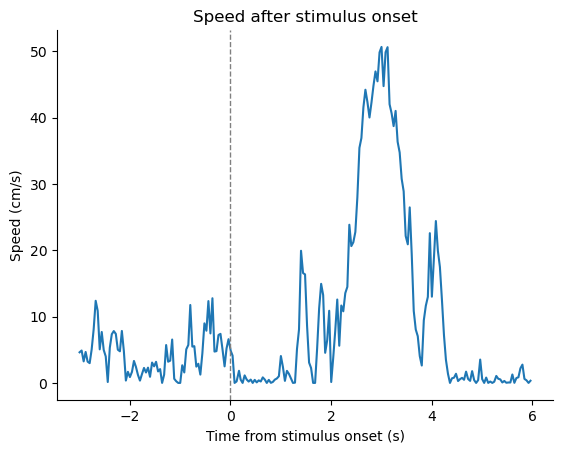

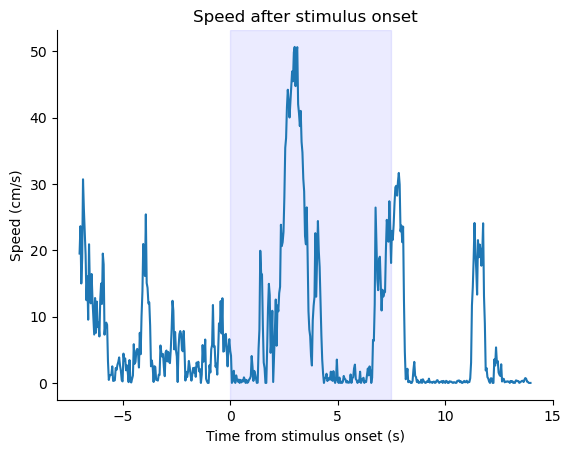

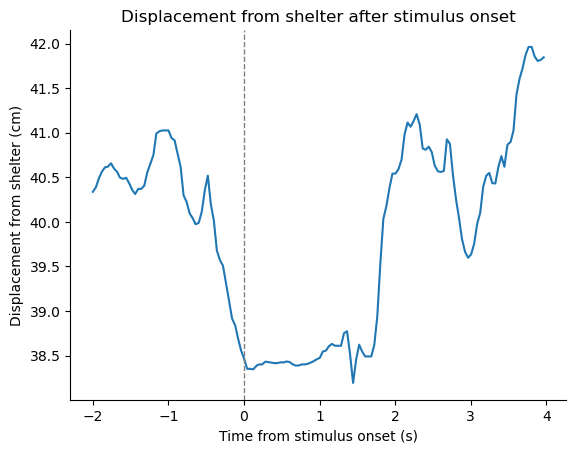

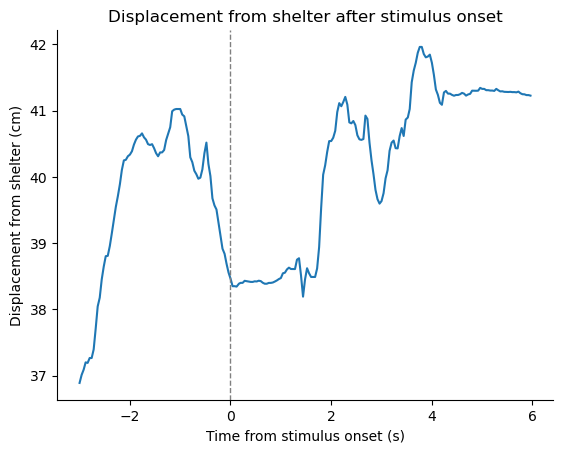

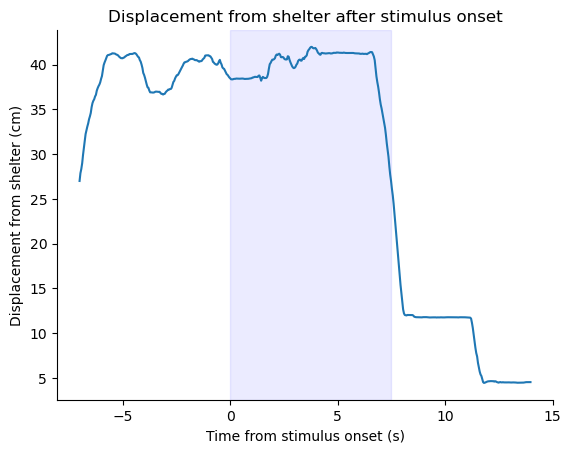

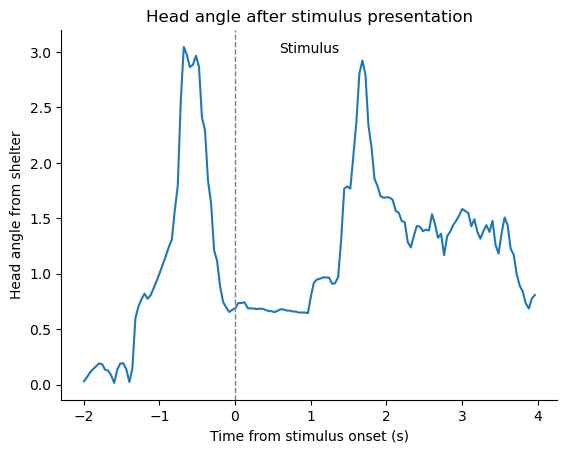

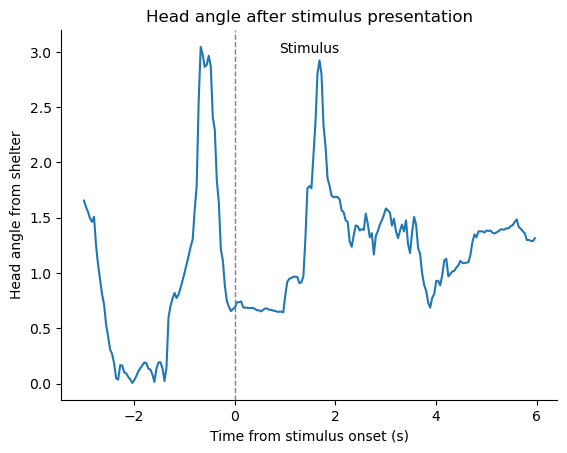

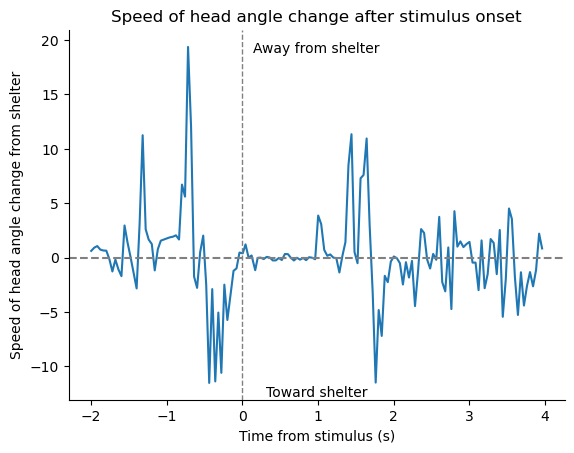

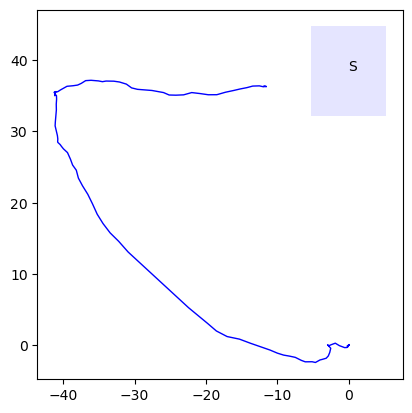

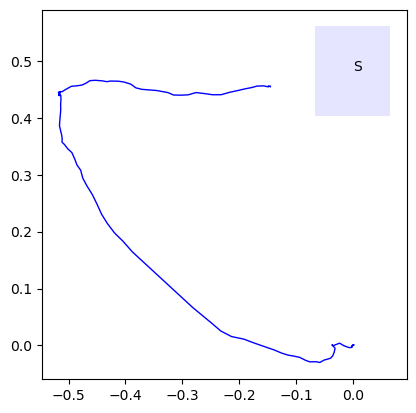

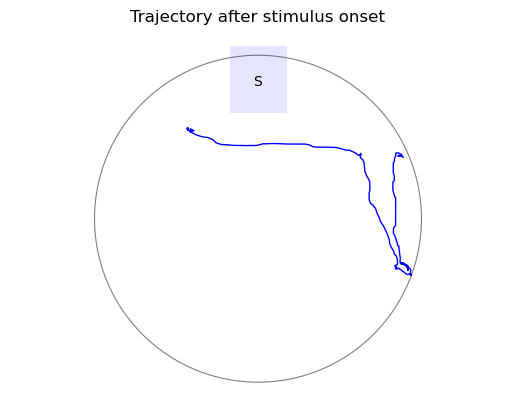

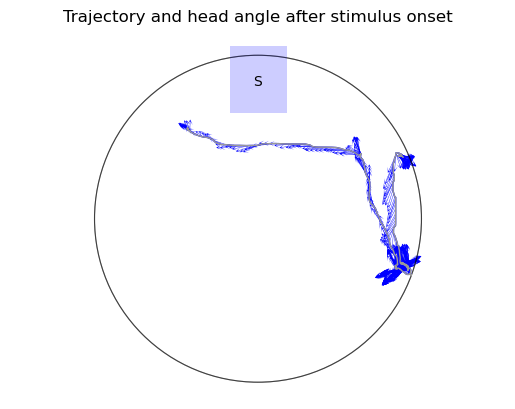

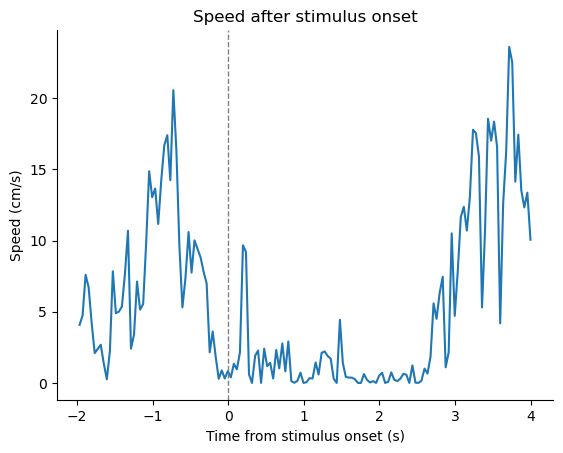

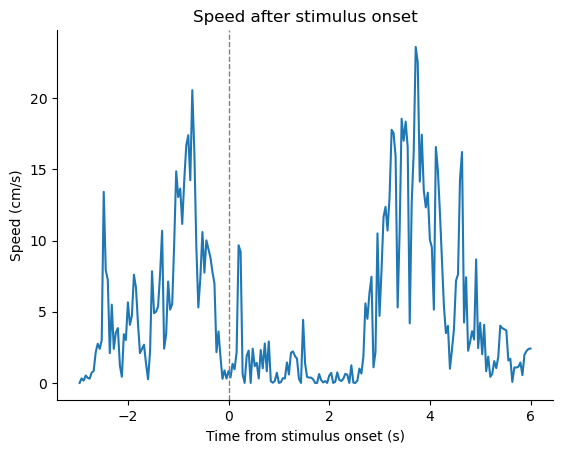

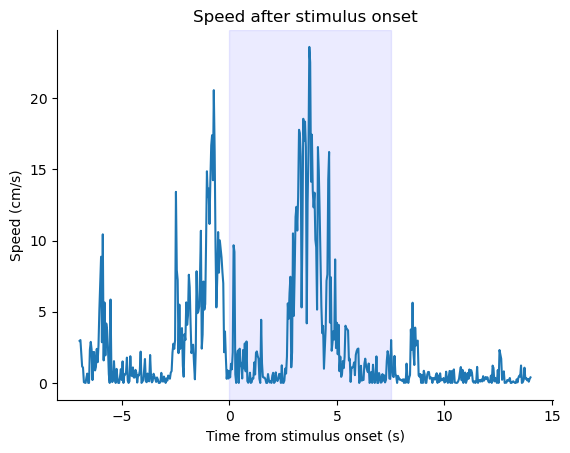

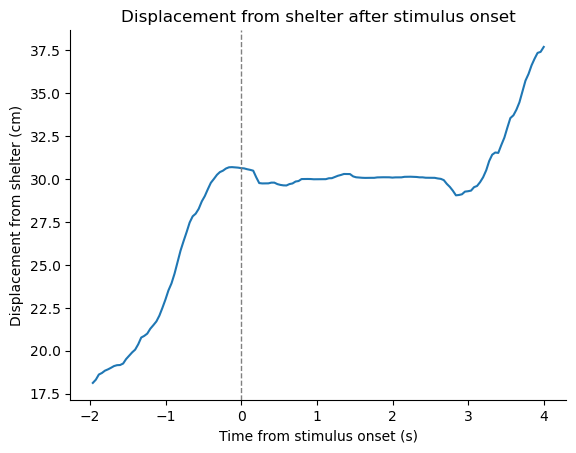

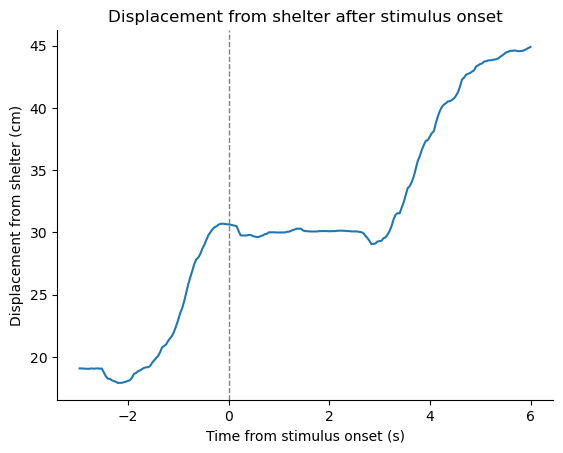

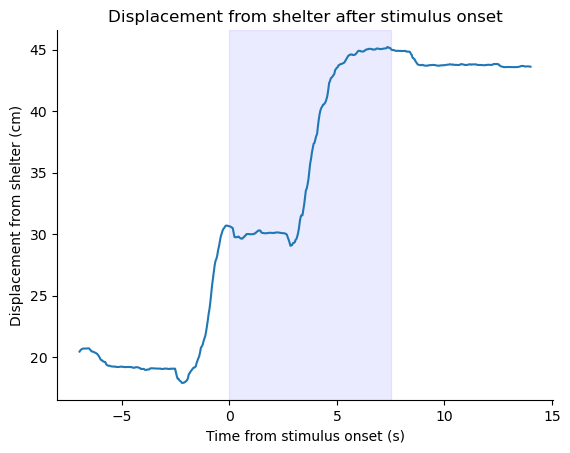

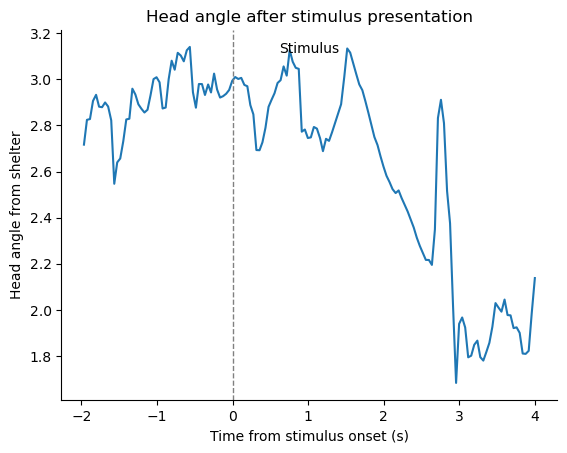

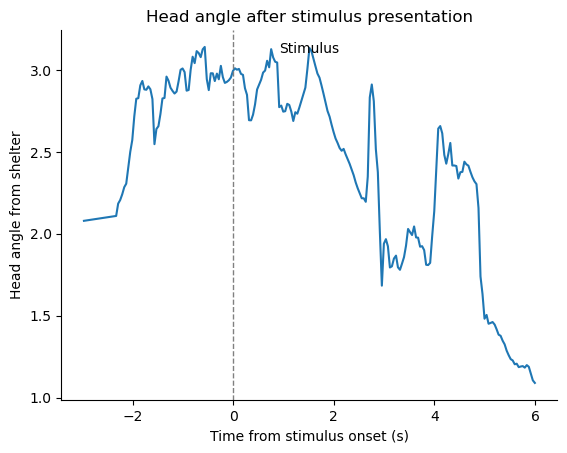

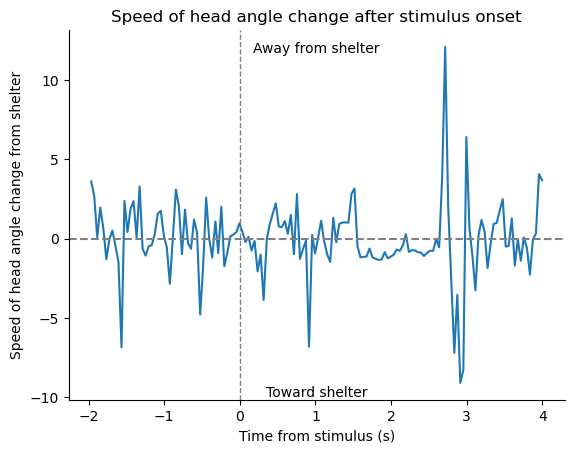

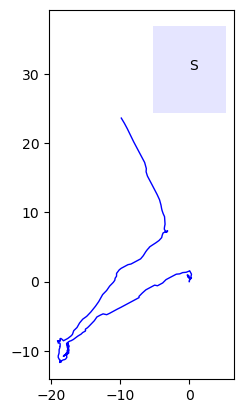

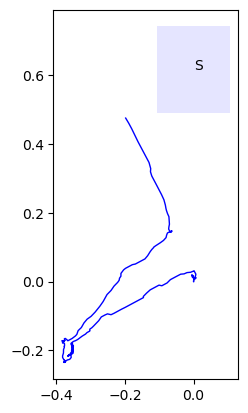

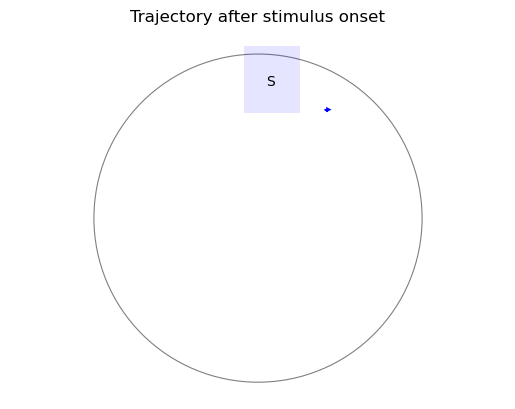

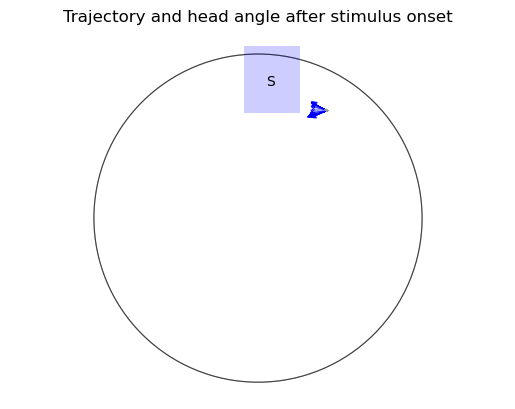

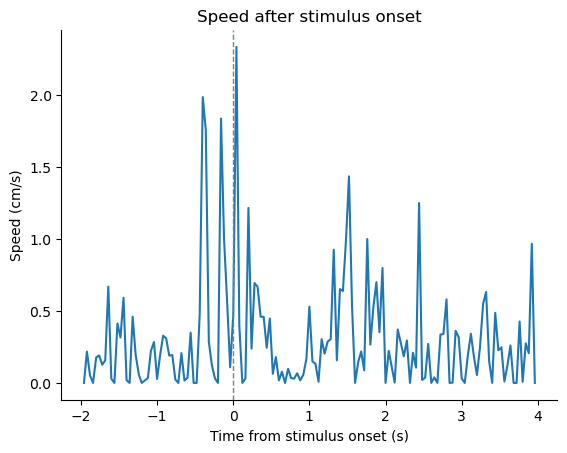

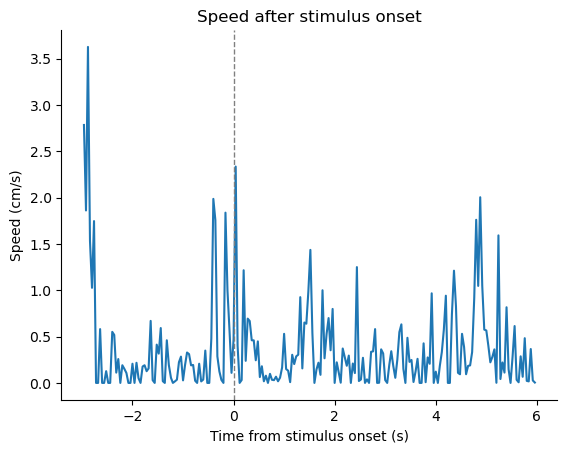

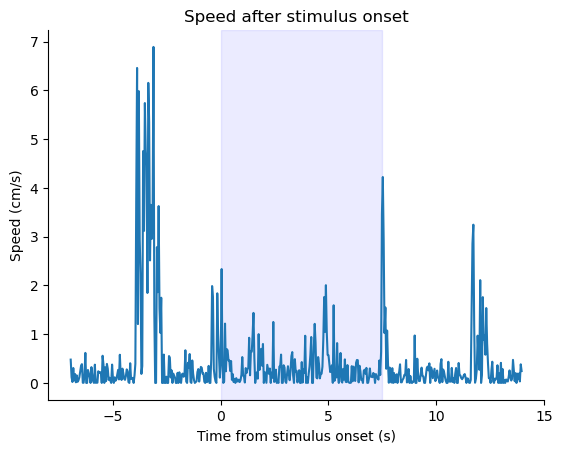

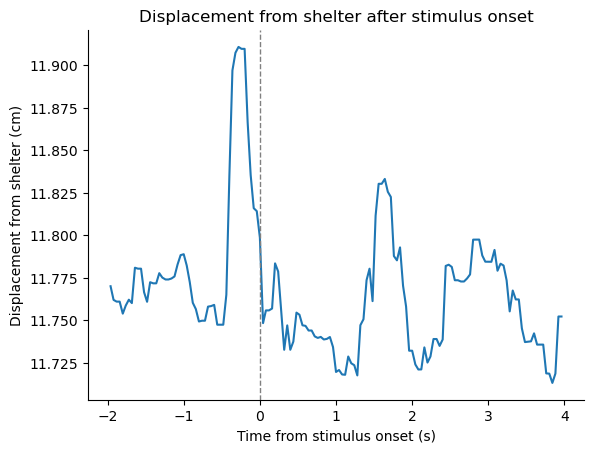

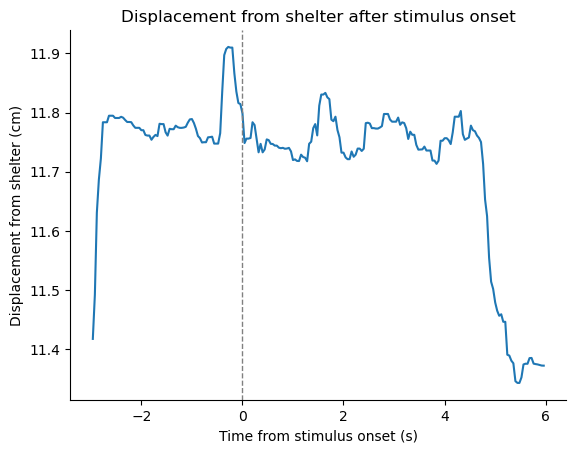

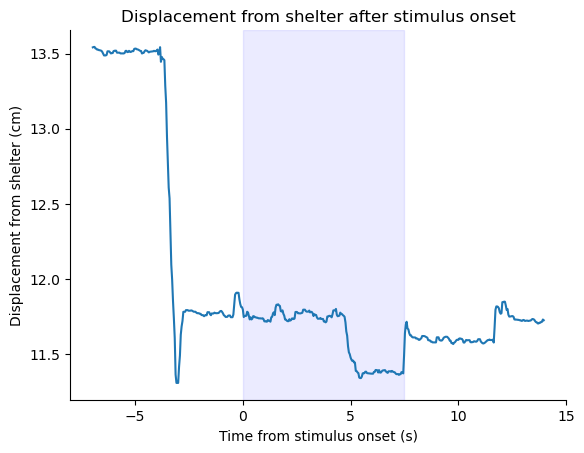

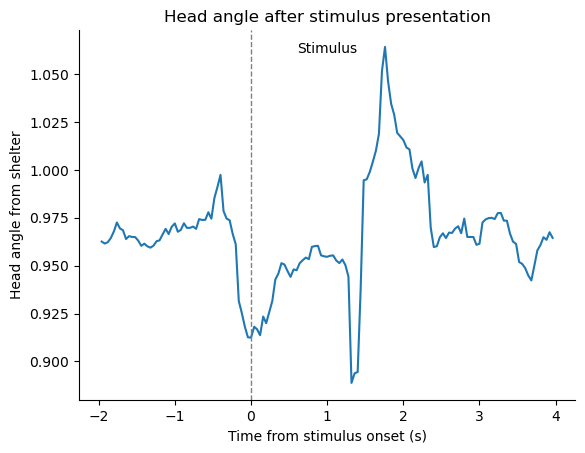

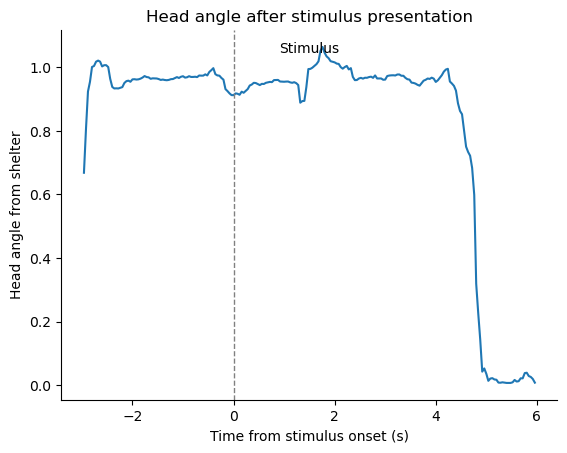

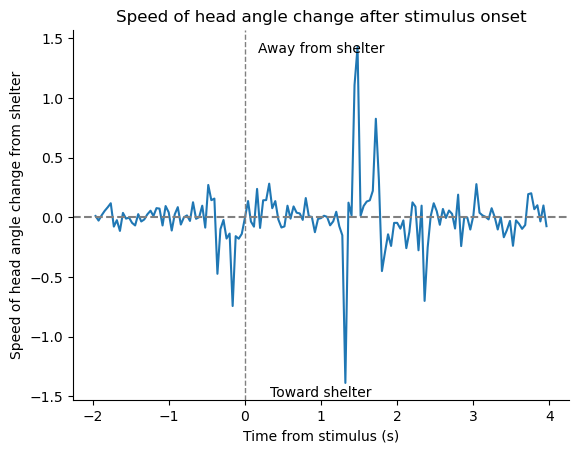

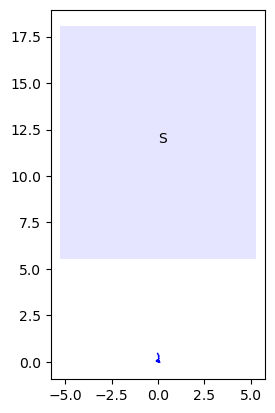

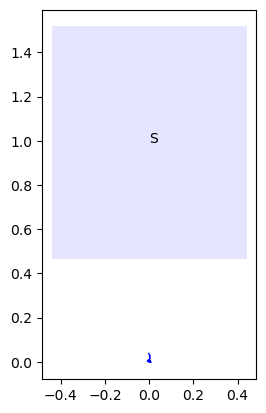

In [3]:
%run graphing_function_recent.ipynb

%run D1_M1.ipynb
M1_coord_scaled = coord_scaled
M1_escape_only = escape_only
M1_four_second = four_second
M1_six_second = six_second
M1_long_range = long_range
M1_initial_displacement = initial_displacement
M1_total_distance = total_distance
M1_shelter_x = shelter_x
M1_shelter_y = shelter_y
M1_normalized_df = normalized_df
M1_shelter_normalized_x = shelter_normalized_x
M1_shelter_normalized_y = shelter_normalized_y
M1_rotate = rotate

%run D1_M2_stimulus1.ipynb
M2_coord_scaled = coord_scaled
M2_escape_only = escape_only
M2_four_second = four_second
M2_six_second = six_second
M2_long_range = long_range
M2_initial_displacement = initial_displacement
M2_total_distance = total_distance
M2_shelter_x = shelter_x
M2_shelter_y = shelter_y
M2_normalized_df = normalized_df
M2_shelter_normalized_x = shelter_normalized_x
M2_shelter_normalized_y = shelter_normalized_y
M2_rotate = rotate

%run D1_M2_stimulus2.ipynb
M3_coord_scaled = coord_scaled
M3_escape_only = escape_only
M3_four_second = four_second
M3_six_second = six_second
M3_long_range = long_range
M3_initial_displacement = initial_displacement
M3_total_distance = total_distance
M3_shelter_x = shelter_x
M3_shelter_y = shelter_y
M3_normalized_df = normalized_df
M3_shelter_normalized_x = shelter_normalized_x
M3_shelter_normalized_y = shelter_normalized_y
M3_rotate = rotate

%run D1_M4_stimulus2.ipynb
M4_coord_scaled = coord_scaled
M4_escape_only = escape_only
M4_four_second = four_second
M4_six_second = six_second
M4_long_range = long_range
M4_initial_displacement = initial_displacement
M4_total_distance = total_distance
M4_shelter_x = shelter_x
M4_shelter_y = shelter_y
M4_normalized_df = normalized_df
M4_shelter_normalized_x = shelter_normalized_x
M4_shelter_normalized_y = shelter_normalized_y
M4_rotate = rotate

In [4]:
n=4

In [5]:
def compile_parameters():
    plt.figure()
    ax=plt.axes()

    x = displacement_inter_six['time']
    y = displacement_inter_six['average']
    y_up = displacement_inter_six['SEM_up']
    y_down = displacement_inter_six['SEM_down']

    ax.plot(x,y, label = 'displacement')
    ax.plot(x,y_up, color = 'none')
    ax.plot(x,y_down, color = 'none')
    plt.fill_between(x,y_up, y_down, color = 'blue', alpha = .05)
    ax.set_xlabel('Time from stimulus onset (s)')
    ax.set_ylabel('Normalized values') #convert to cm - cm/s
    ax.set_title('Average displacement, speed, and head angle after stimulus onset')
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=1)

    xs = speed_inter_six['time']
    ys = speed_inter_six['average']
    y_ups = speed_inter_six['SEM_up']
    y_downs = speed_inter_six['SEM_down']

    ax.plot(xs,ys, color='red', label = 'speed')
    ax.plot(xs,y_ups, color = 'none')
    ax.plot(xs,y_downs, color = 'none')
    plt.fill_between(xs,y_ups, y_downs, color = 'red', alpha = .05)

    xa = angle_inter_six['time']
    ya = angle_inter_six['average']
    y_upa = angle_inter_six['SEM_up']
    y_downa = angle_inter_six['SEM_down']

    ax.plot(xa,ya, color='green', label = 'head angle')
    ax.plot(xa,y_upa, color = 'none')
    ax.plot(xa,y_downa, color = 'none')
    plt.fill_between(xa,y_upa, y_downa, color = 'green', alpha = .05)

    plt.legend(loc = 'upper right')
    return plt

In [6]:
def plot_linearity_ratio(n):
    plt.figure()
    ax = plt.axes()
    
    max_x = float('-inf')
    min_x = float('inf')


    for i in range(1, n+1):
        x_data = globals()[f'M{i}_initial_displacement']
        y_data = globals()[f'M{i}_total_distance']
        ax.scatter(x_data, y_data)
        
        # Update min and max values for x and y data
        max_x = max(max_x, x_data.max())
        min_x = min(min_x, x_data.min())
    
    # Plot y=x line based on x_data range
    ax.plot([min_x, max_x], [min_x, max_x], color='gray', linestyle='--', linewidth=1)
    
    ax.xaxis.set_major_locator(plt.MultipleLocator(10))
    ax.yaxis.set_major_locator(plt.MultipleLocator(10))
    
    ax.set_ylabel('Total distance traveled (cm)') #convert to cm - cm/s
    ax.set_title('Initial displacement from shelter (cm)')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
            
    return plt

In [7]:
#interpolate data, combine into one dataframe, and find mean/SEM - input number of mice, start, ,stop, step, column of interest, dataframe of interes
#displacement 
displacement_inter_four = interpolate_all(n, -2, 4, .04, 'displacement', 'four_second')
summarize_data(n, 'four_second_interpolated', displacement_inter_four)

displacement_inter_six = interpolate_all(n, -3, 6, .04, 'displacement', 'six_second')
summarize_data(n, 'six_second_interpolated', displacement_inter_six)

#speed
speed_inter_four = interpolate_all(n, -2, 4, .04, 'speed', 'four_second')
summarize_data(n, 'four_second_interpolated', speed_inter_four)

speed_inter_six = interpolate_all(n, -3, 6, .04, 'speed', 'six_second')
summarize_data(n, 'six_second_interpolated', speed_inter_six)

#head angle
angle_inter_four = interpolate_all(n, -2, 4, .04, 'head_angle', 'four_second')
summarize_data(n, 'four_second_interpolated', angle_inter_four)

angle_inter_six = interpolate_all(n, -3, 6, .04, 'head_angle', 'six_second')
summarize_data(n, 'six_second_interpolated', angle_inter_six)

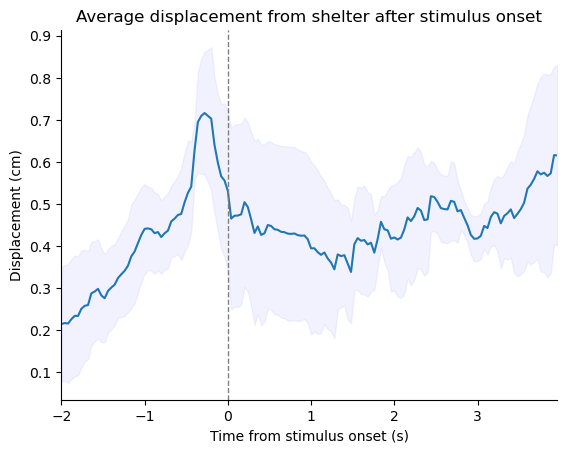

In [8]:
plot_compiled_displacement(displacement_inter_four,7.5, 4)

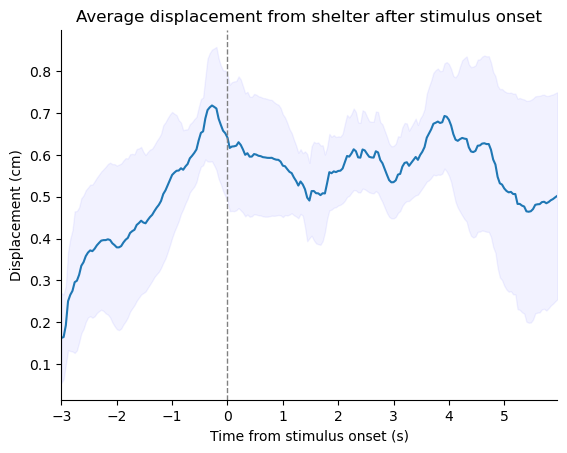

In [9]:
plot_compiled_displacement(displacement_inter_six, 7.5,4)

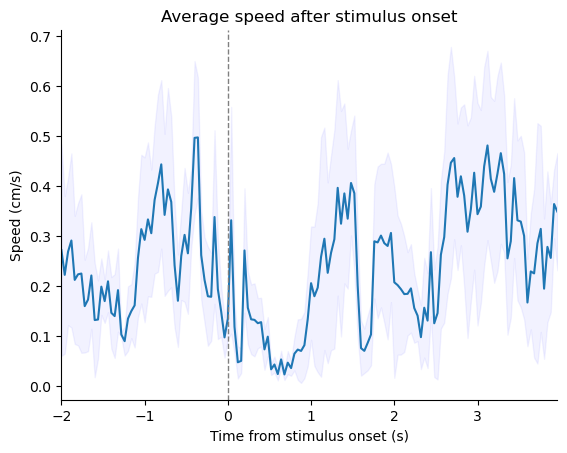

In [10]:
plot_compiled_speed(speed_inter_four,7.5, 4)

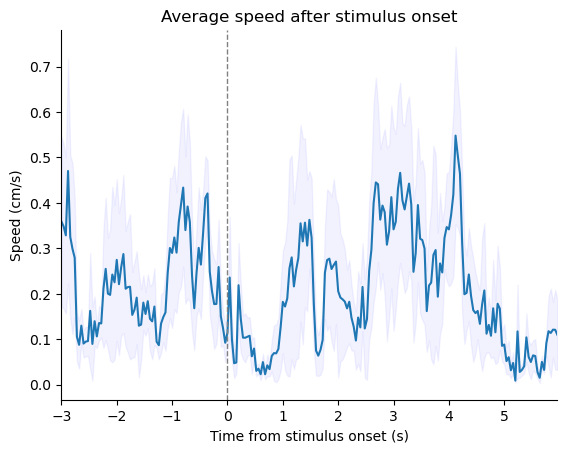

In [11]:
plot_compiled_speed(speed_inter_six, 7.5,4)

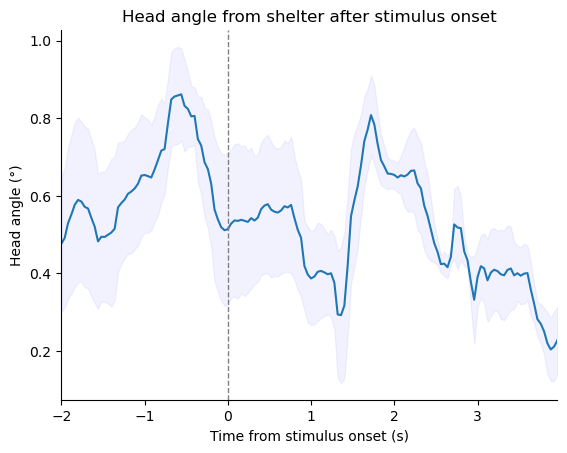

In [12]:
plot_compiled_angle(angle_inter_four,7.5, 4)

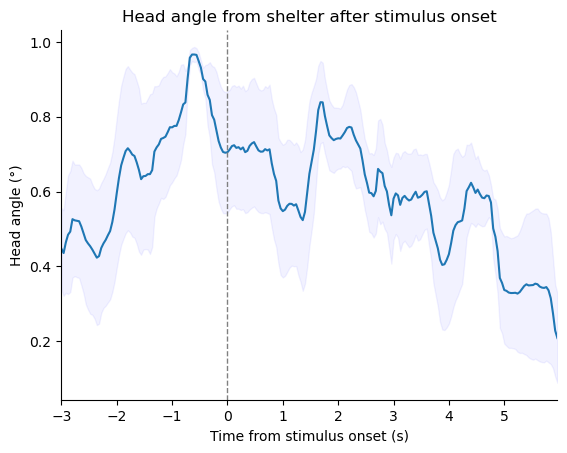

In [13]:
plot_compiled_angle(angle_inter_six, 7.5,4)

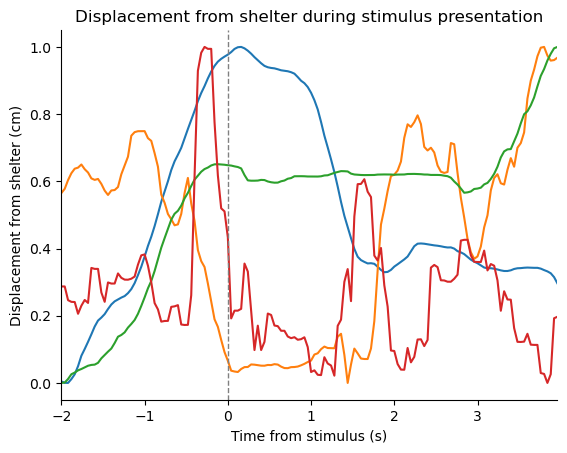

In [14]:
plot_all_displacement(displacement_inter_four, mouse_columns(n, 'four_second_interpolated'), 7, 4)

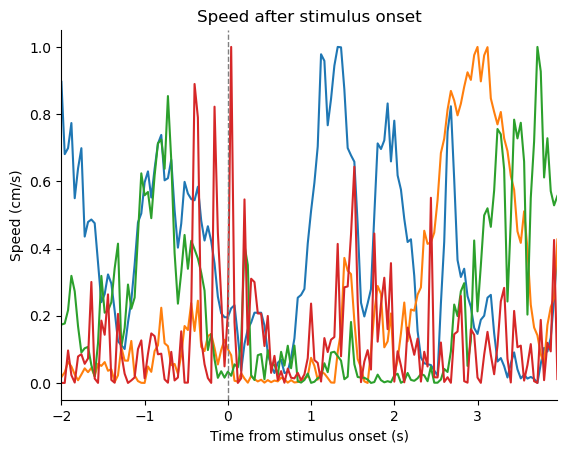

In [15]:
plot_all_speed(speed_inter_four, mouse_columns(n, 'four_second_interpolated'), 4, 4)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

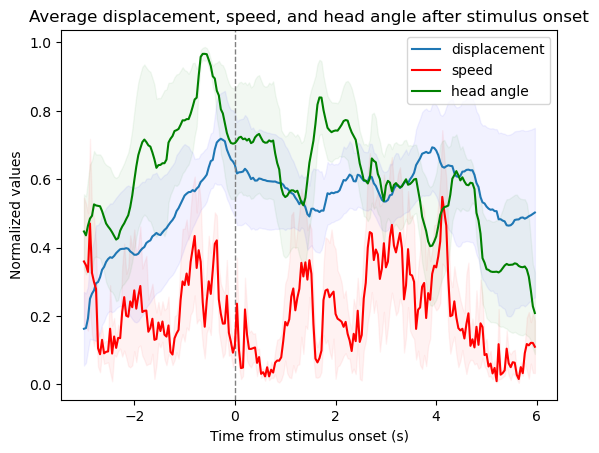

In [16]:
compile_parameters()

In [17]:
def plot_compiled_trajectory(n):
    fig, ax = plt.subplots()
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'yellowgreen']

    for i in range (1, n+1):
        mice = mouse_columns(n, 'normalized_df')
        df = globals()[mice[i-1]]
        ax.plot(df['x'],df['y'], color = colors[i-1], linewidth = 1)
        
    #add an arrow to show mouse's direction
        xf = df['x'].iloc[-1] #final x coordinate
        xo = df['x'].iloc[-2] #second to last x coordinate

        yf = df['y'].iloc[-1] #final y coordinate
        yo = df['y'].iloc[-2] #second to last y coordinate

    #plot arrow: base x, base y, displacement x, displacement y
        ax.arrow(xo, yo, xf-xo, yf-yo, head_width = .03, head_length = .03, fc =colors[i-1], ec = "none")
        ax.set_title('Trajectory after stimulus onset')  #would be after stimulus
        ax.set_xlabel('x-position (cm)', fontsize=12)
        ax.set_ylabel('y-position (cm)', fontsize=12)
    
        
    #ax.arrow(xo, yo, xf-xo, yf-yo, head_width = .03, head_length = .03, fc = 'blue', ec = "none")

    ax.set_aspect('equal')
    ax.text(0,1, 'S', color = 'black', size = 10)

    return plt

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

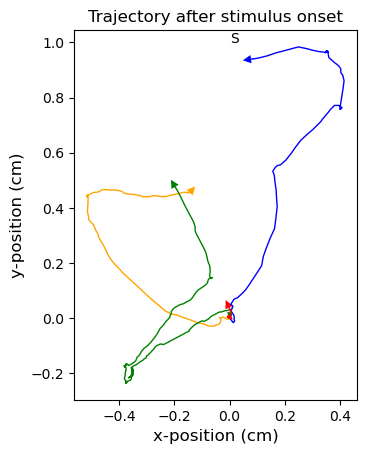

In [18]:
plot_compiled_trajectory(n)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

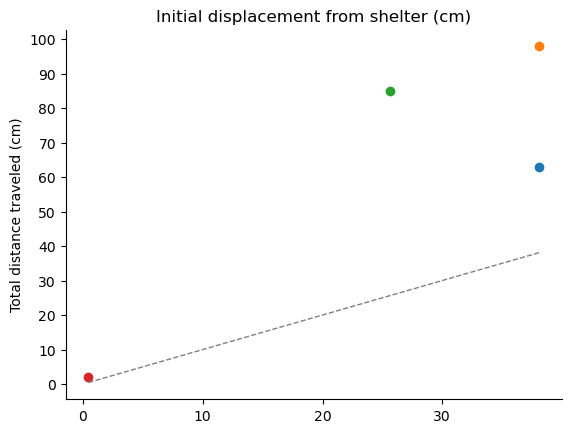

In [19]:
plot_linearity_ratio(n)